In [ ]:
# Import necessary libraries that are not on Colab by default
!pip install patool
!pip install sktime
!pip install reformer-pytorch
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!chmod 755 -R /content/drive/MyDrive/Colab\ Notebooks/Time-Series-Library-main/

Mounted at /content/drive


In [ ]:
# Before running the script below, check if GPU is set properly
import torch
if torch.cuda.is_available:
  print('GPU available')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

GPU available


In [ ]:

%run /content/drive/MyDrive/Colab\ Notebooks/Time-Series-Library-main/run.py \
  --task_name long_term_forecast \
  --is_training 1 \
  --root_path /content/drive/MyDrive/Colab\ Notebooks/Time-Series-Library-main/dataset/ \
  --data_path ETTh1.csv \
  --model_id ETTh1_96_96 \
  --model TimesNet \
  --data ETTh1 \
  --features M \
  --seq_len 96 \
  --label_len 48 \
  --pred_len 96 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 7 \
  --dec_in 7 \
  --c_out 7 \
  --d_model 16 \
  --d_ff 32 \
  --des 'Exp' \
  --itr 1 \
  --top_k 5

Args in experiment:
Basic Config
  Task Name:          long_term_forecast  Is Training:        1                   
  Model ID:           ETTh1_96_96         Model:              TimesNet            

Data Loader
  Data:               ETTh1               Root Path:          /content/drive/MyDrive/Colab Notebooks/Time-Series-Library-main/dataset/
  Data Path:          ETTh1.csv           Features:           M                   
  Target:             OT                  Freq:               h                   
  Checkpoints:        ./checkpoints/      

Forecasting Task
  Seq Len:            96                  Label Len:          48                  
  Pred Len:           96                  Seasonal Patterns:  Monthly             
  Inverse:            0                   

Model Parameters
  Top k:              5                   Num Kernels:        6                   
  Enc In:             7                   Dec In:             7                   
  C Out:              7          

SyntaxError: invalid syntax (<ipython-input-25-4a1534002e4d>, line 1)

In [ ]:
%run /content/drive/MyDrive/Colab\ Notebooks/Time-Series-Library-main/run.py \
  --task_name short_term_forecast \
  --is_training 1 \
  --root_path /content/drive/MyDrive/Colab\ Notebooks/Time-Series-Library-main/dataset/ \
  --data_path samsung19_27.csv \
  --model_id samsung19_27 \
  --model TimesNet \
  --data ETTh1 \
  --features M \
  --seq_len 60 \
  --label_len 30 \
  --pred_len 60 \
  --e_layers 2 \
  --d_layers 1 \
  --factor 3 \
  --enc_in 6 \
  --dec_in 6 \
  --c_out 6 \
  --d_model 16 \
  --d_ff 32 \
  --des 'Exp' \
  --itr 1 \
  --top_k 5

In [ ]:
import pandas as pd
ett = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time-Series-Library-main/dataset/ETTh1.csv')
sam = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time-Series-Library-main/dataset/samsung19_27.csv')

In [ ]:
ett.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5 non-null      object 
 1   HUFL    5 non-null      float64
 2   HULL    5 non-null      float64
 3   MUFL    5 non-null      float64
 4   MULL    5 non-null      float64
 5   LUFL    5 non-null      float64
 6   LULL    5 non-null      float64
 7   OT      5 non-null      float64
dtypes: float64(7), object(1)
memory usage: 448.0+ bytes


In [ ]:
sam.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   5 non-null      object 
 1   Open       5 non-null      float64
 2   High       5 non-null      float64
 3   Low        5 non-null      float64
 4   Close      5 non-null      float64
 5   Adj Close  5 non-null      float64
 6   Volume     5 non-null      int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 408.0+ bytes


In [ ]:
export LC_ALL=en_US.UTF-8
export LANG=en_US.UTF-8


Error: unsupported locale setting

### 여기서부터

In [5]:
!pip install neuralforecast
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
from neuralforecast.core import NeuralForecast
from neuralforecast.models import NHITS, NBEATS, TimesNet
from neuralforecast.losses.numpy import mae, mse
from neuralforecast.auto import AutoTimesNet
from neuralforecast.models import DeepAR
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.5/193.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [63]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Time-Series-Library-main/dataset/samsung19_27.csv')

In [64]:
df.rename(columns={'Datetime': 'ds'}, inplace=True)
df.rename(columns={'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df['unique_id'] = 'OT'

In [65]:
df

,ds,Open,High,Low,y,Adj Close,Volume,unique_id
0,2024-03-19 09:00:00+09:00,72300.0,72400.0,72200.0,72200.0,72200.0,0,OT
1,2024-03-19 09:01:00+09:00,72300.0,72300.0,72000.0,72100.0,72100.0,490407,OT
2,2024-03-19 09:02:00+09:00,72100.0,72100.0,71800.0,71900.0,71900.0,619211,OT
3,2024-03-19 09:03:00+09:00,71900.0,71900.0,71800.0,71800.0,71800.0,136585,OT
4,2024-03-19 09:04:00+09:00,71900.0,72000.0,71800.0,72000.0,72000.0,180283,OT
...,...,...,...,...,...,...,...,...
2505,2024-03-27 14:55:00+09:00,79500.0,79600.0,79500.0,79500.0,79500.0,12431,OT
2506,2024-03-27 14:56:00+09:00,79500.0,79600.0,79500.0,79500.0,79500.0,13296,OT
2507,2024-03-27 14:57:00+09:00,79500.0,79600.0,79500.0,79500.0,79500.0,13913,OT
2508,2024-03-27 14:58:00+09:00,79500.0,79600.0,79500.0,79600.0,79600.0,16577,OT


In [66]:
df_2 = df.copy()
# df_2['ds'] = np.arange(len(df))
# df_2

In [67]:
train_df = df_2.iloc[:-60,:]
test_df = df_2.iloc[-60:,:]

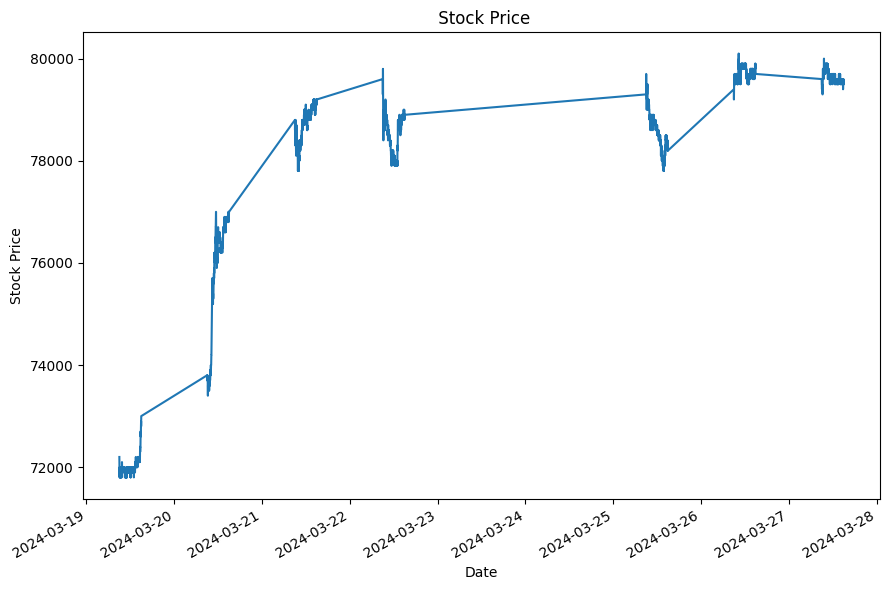

In [68]:
fig, ax = plt.subplots()

ax.plot(df_2['ds'], df_2['y'])
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title(' Stock Price')

fig.autofmt_xdate()
plt.tight_layout()

<Axes: xlabel='ds'>

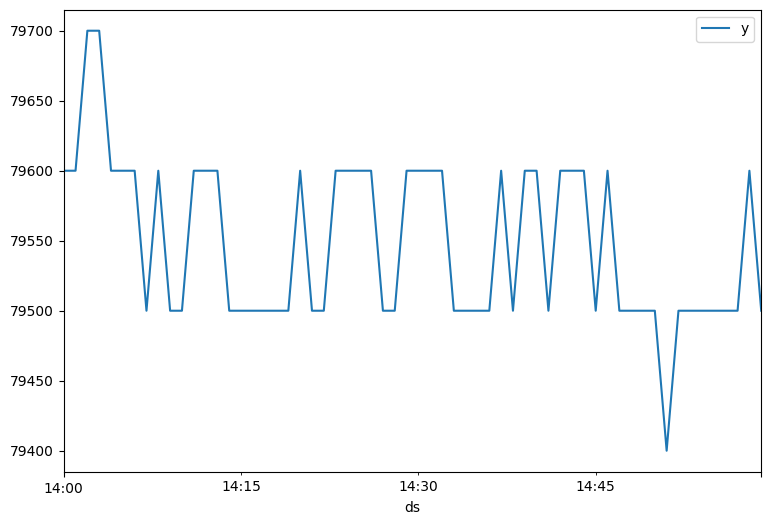

In [69]:
test_df = df_2.iloc[-60:, :]
test_df.plot(x='ds', y='y')

In [70]:
horizon = 60

# models = TimesNet(h=horizon,
#                  input_size= 2*horizon,
#                  max_steps= horizon )
models = TimesNet(h=horizon,
                 input_size= 3*horizon,
                 max_steps= 12 )

nf = NeuralForecast(models=[models], freq='T')

INFO:lightning_fabric.utilities.seed:Seed set to 1


In [317]:
nf.fit(train_df)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [318]:
Y_hat_df = nf.cross_validation(df=train_df, step_size=horizon, n_windows = 7)
Y_hat_df = Y_hat_df.reset_index()
##### train set 학습 결과 #####
fig, ax = plt.subplots()

preds_df = Y_hat_df.set_index('ds')

ax.plot(preds_df['y'], label='actual')

ax.plot(preds_df['TimesNet'], label='TimesNet', ls='--')

ax.legend(loc='best')
ax.set_xlabel('Time steps')
ax.set_ylabel('Stock Price')
ax.set_title('Samsung Stock Price')

fig.autofmt_xdate()
plt.tight_layout()

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [72]:
##### test set 적용 #####
preds = nf.predict(futr_df=test_df)
preds

Exception: You must pass a DataFrame or have one stored.

In [299]:
preds

,ds,TimesNet
unique_id,,
OT,1970-01-02 17:20:00,79534.960938
OT,1970-01-02 17:21:00,79573.578125
OT,1970-01-02 17:22:00,79554.789062
OT,1970-01-02 17:23:00,79571.789062
OT,1970-01-02 17:24:00,79559.148438
OT,1970-01-02 17:25:00,79590.296875
OT,1970-01-02 17:26:00,79555.406250
OT,1970-01-02 17:27:00,79577.625000
OT,1970-01-02 17:28:00,79593.765625


NameError: name 'preds' is not defined

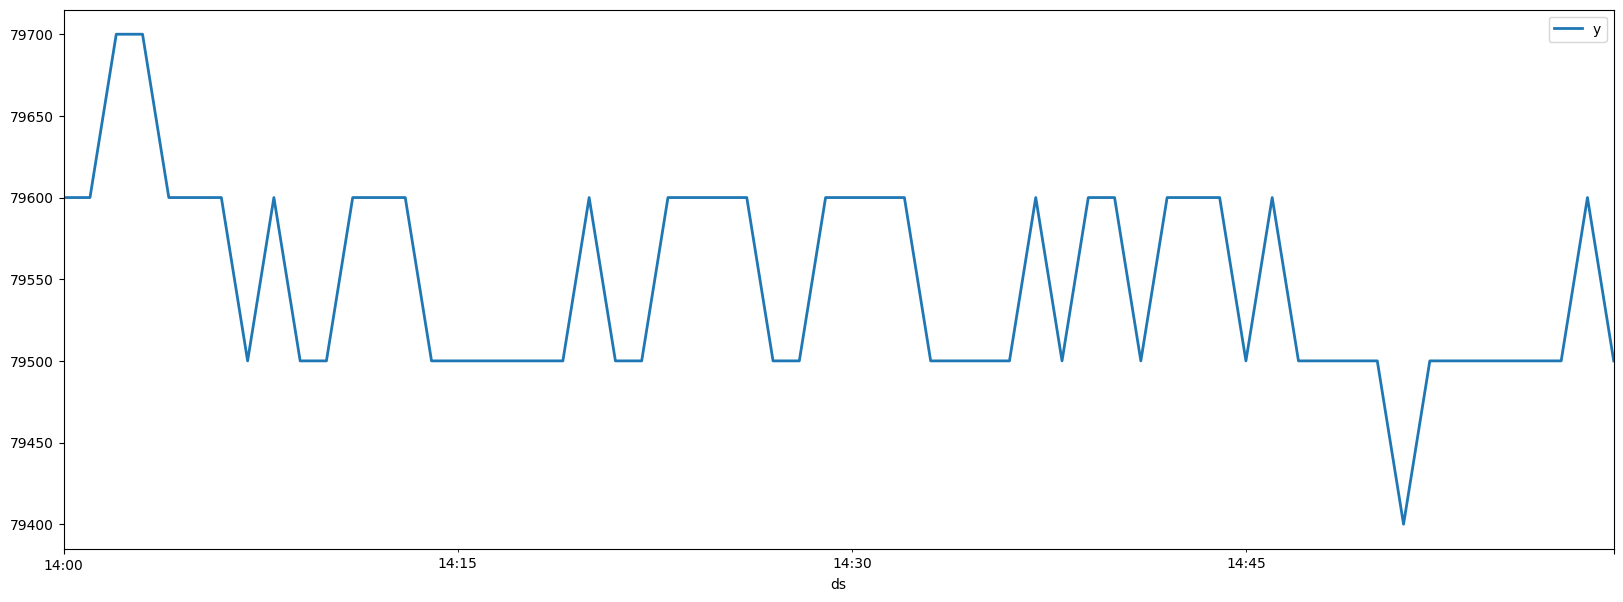

In [75]:
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
actual = test_df.set_index('ds')
actual[['y']].plot(ax=ax, linewidth=2)
pred_df = preds.set_index('ds')
pred_df[['TimesNet']].plot(ax=ax, linewidth=2)

ax.set_title('Samsung Stock Price', fontsize=22)
ax.set_ylabel('Stock Price', fontsize=20)
ax.set_xlabel('Trading Day ', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
data = {'TimesNet': [mae(preds_df['TimesNet'], preds_df['y']), mse(preds_df['TimesNet'], preds_df['y'])]}

metrics_df = pd.DataFrame(data=data)
metrics_df.index = ['mae', 'mse']

metrics_df.style.highlight_min(color='lightgreen', axis=1)